In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv('Dataset/Salary_dataset.csv')

In [19]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [22]:
x=df['YearsExperience']
y=df['Salary']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train=np.vstack((np.ones_like(x_train),x_train)).T
x_test=np.vstack((np.ones_like(x_test),x_test)).T

In [25]:
def l_r(X,y,learning_rate,epochs):
    m,n=X.shape
    weights=np.zeros(n)
    cost_list=[]
    
    for _ in range(epochs):
        pred=np.dot(X,weights)
        err=pred-y
        #print('error',err)
        gradient=np.dot(X.T,err)/m
        #print(gradient)
        weights-=learning_rate*gradient
        
        cost=(1/(2*m))*np.sum(err**2)
        cost_list.append(cost)
        
    return weights,cost_list

learning_rate=0.01
epochs=10
weights,cost_list=l_r(x_train,y_train,learning_rate,epochs)
y_pred_test=np.dot(x_test,weights)
mse=np.mean((y_test-y_pred_test)**2)
rmse=np.sqrt(mse)
mae=np.mean(np.abs(y_test-y_pred_test))
total_varaince=np.sum(y_test-np.mean(y_test)**2)
r2=1-(mse/total_varaince)

In [26]:
print(f"rmse value is {rmse}")
print(f"mse value is {mse}")
print(f" mae value is {mae}")
print(f" r2 score is {r2}")

rmse value is 11867.269561141406
mse value is 140832086.83679333
 mae value is 10454.238961518182
 r2 score is 1.0033920349814154


In [27]:
res_df=pd.DataFrame({
    'Actual values':y_test,
    'predict_values':y_pred_test,
    'Difference (actual - predicted)':y_test-y_pred_test
})
res_df

,Actual values,predict_values,Difference (actual - predicted)
27,112636.0,123882.233875,-11246.233875
15,67939.0,64994.884291,2944.115709
23,113813.0,106341.321233,7471.678767
17,83089.0,70006.573617,13082.426383
8,64446.0,43695.204654,20750.795346
9,57190.0,49959.816312,7230.183688


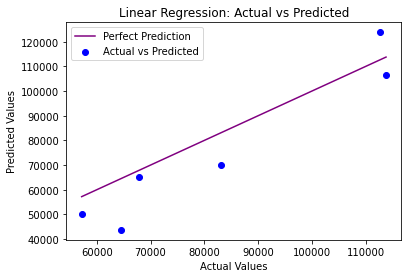

In [28]:

plt.scatter(res_df['Actual values'], res_df['predict_values'], color='blue', label='Actual vs Predicted')

plt.plot([min(res_df['Actual values']), max(res_df['Actual values'])],
         [min(res_df['Actual values']), max(res_df['Actual values'])], linestyle='-', color='purple', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.show()
